In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Dataset Explotory Analysis

In this part, I will perform analyses on dataset tables and crate general information about dataset and then perform missing data handling operations and finally denormalize the necessary columns in the dataset.

In [368]:
# let's import the dataset
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
prior_orders = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')

## Dataset Information

In this part, I will explore the size and dtypes of dataset.

In [4]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
prior_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [369]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## Handling Missing Data

In this part, I will identify NaN values and try to handle missing information.

First, I will start with Order table and cover all the tables and columns which has NaN values.

When we analyse the order data, there are many NaN values in days_since_prior_order.

In [11]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

```days_since_prior_order```column has 206.209 NaN values because of the order is the first order of the customer. We can handle NaN values simply with filling with zeros.

In [18]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(value = 0)

In [19]:
orders[orders['days_since_prior_order'].isnull()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [20]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [21]:
prior_orders.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [22]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [23]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

There are no null values in the dataset after our missing data operations.

## Denormalization and Generation

In this part, I will make denormalization operations on dataset and generate data for necessary columns.First, I will start with `orders`table. `order_dow`column is showing the numerical value of the day like zero for sunday. I created a new column with the actual name of the weekday. After that I rearanged the column names appropriately.

In [25]:
#lets first create our conditions and values

conditions = [(orders['order_dow'] == 0),
              (orders['order_dow'] == 1),
              (orders['order_dow'] == 2),
              (orders['order_dow'] == 3),
              (orders['order_dow'] == 4),
              (orders['order_dow'] == 5),
              (orders['order_dow'] == 6)
             ]

values = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

#then create new colmn called order_day 

orders['order_day'] = np.select(conditions, values)

In [26]:
#Now, we can rearrange the columns 
orders = orders[['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_day',
       'order_hour_of_day', 'days_since_prior_order']]

In [27]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,tuesday,8,0.0
1,2398795,1,prior,2,3,wednesday,7,15.0
2,473747,1,prior,3,3,wednesday,12,21.0
3,2254736,1,prior,4,4,thursday,7,29.0
4,431534,1,prior,5,4,thursday,15,28.0


Like `order_dow`, `order_hour_of_day`column has the similar problem. It shows the hour of the day, but it is more convinient to create a hour segment for clear analysis. 

In [28]:
conditions = [( (orders['order_hour_of_day'] >= 0) & (orders['order_hour_of_day'] <= 6) ),
              (  (orders['order_hour_of_day'] > 6) & (orders['order_hour_of_day'] <= 12) ),
              ( (orders['order_hour_of_day'] > 12) & (orders['order_hour_of_day'] <= 18) ),
              ( (orders['order_hour_of_day'] > 18) & (orders['order_hour_of_day'] <= 23) ),
             ]

values = ['night', 'morning', 'afternoon', 'evening']

orders['day_segment'] = np.select(conditions, values) 

In [29]:
#Now, we can rearrange the columns 
orders = orders[['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_day',
       'order_hour_of_day','day_segment', 'days_since_prior_order']]

In [30]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order
0,2539329,1,prior,1,2,tuesday,8,morning,0.0
1,2398795,1,prior,2,3,wednesday,7,morning,15.0
2,473747,1,prior,3,3,wednesday,12,morning,21.0
3,2254736,1,prior,4,4,thursday,7,morning,29.0
4,431534,1,prior,5,4,thursday,15,afternoon,28.0


Also, we will not work with eval_set data in this dataset. So, we can drop that column on `orders`table.

In [32]:
orders = orders.drop('eval_set', 1)

In [33]:
orders.head()

,order_id,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order
0,2539329,1,1,2,tuesday,8,morning,0.0
1,2398795,1,2,3,wednesday,7,morning,15.0
2,473747,1,3,3,wednesday,12,morning,21.0
3,2254736,1,4,4,thursday,7,morning,29.0
4,431534,1,5,4,thursday,15,afternoon,28.0


# Data Visualization and Basket Analysis

In this part of the project, I will perform data visualization on performance indicators and make a basket analysis on several features of the dataset.

First, I will demonstrate the number of orders for each customer. Please note that, `order_number` is showing the number of orders for each `user_id`

In [34]:
orders_per_customer=orders.groupby("user_id")["order_number"].max().reset_index()

In [35]:
orders_per_customer.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


Text(0, 0.5, 'Number of Customers')

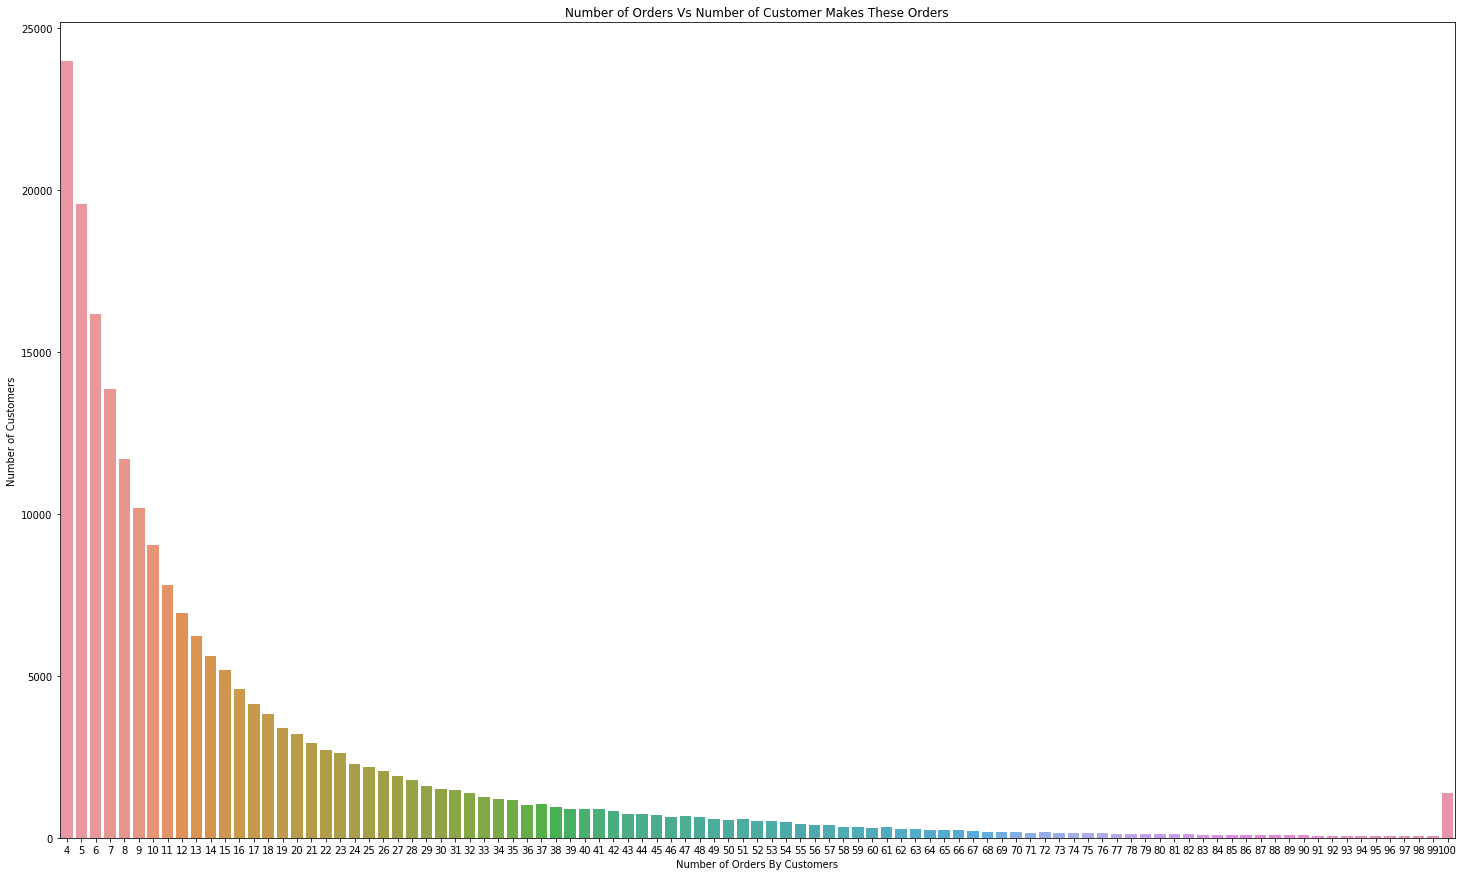

In [36]:
plt.figure(figsize=(25,15))
sns.countplot(orders_per_customer["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders")
plt.xlabel("Number of Orders By Customers")
plt.ylabel("Number of Customers")

It is wise to create bins for number of orders.

In [37]:
purchase_frequency = orders.groupby(by =['user_id'], as_index = True).aggregate({'order_number' : 'max'}).reset_index()

In [38]:
purchase_frequency.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


In [48]:
bins = [3, 10 , 21 , 31 , 41, 51, 71, 91, 101]

freq_bins  = pd.DataFrame(pd.cut(purchase_frequency['order_number'], bins), index = purchase_frequency['user_id'])

In [49]:
freq_bins.reset_index(inplace = True)

In [50]:
freq_bins.head()

,user_id,order_number
0,1,"(10, 21]"
1,2,"(10, 21]"
2,3,"(3, 10]"
3,4,"(3, 10]"
4,5,"(3, 10]"


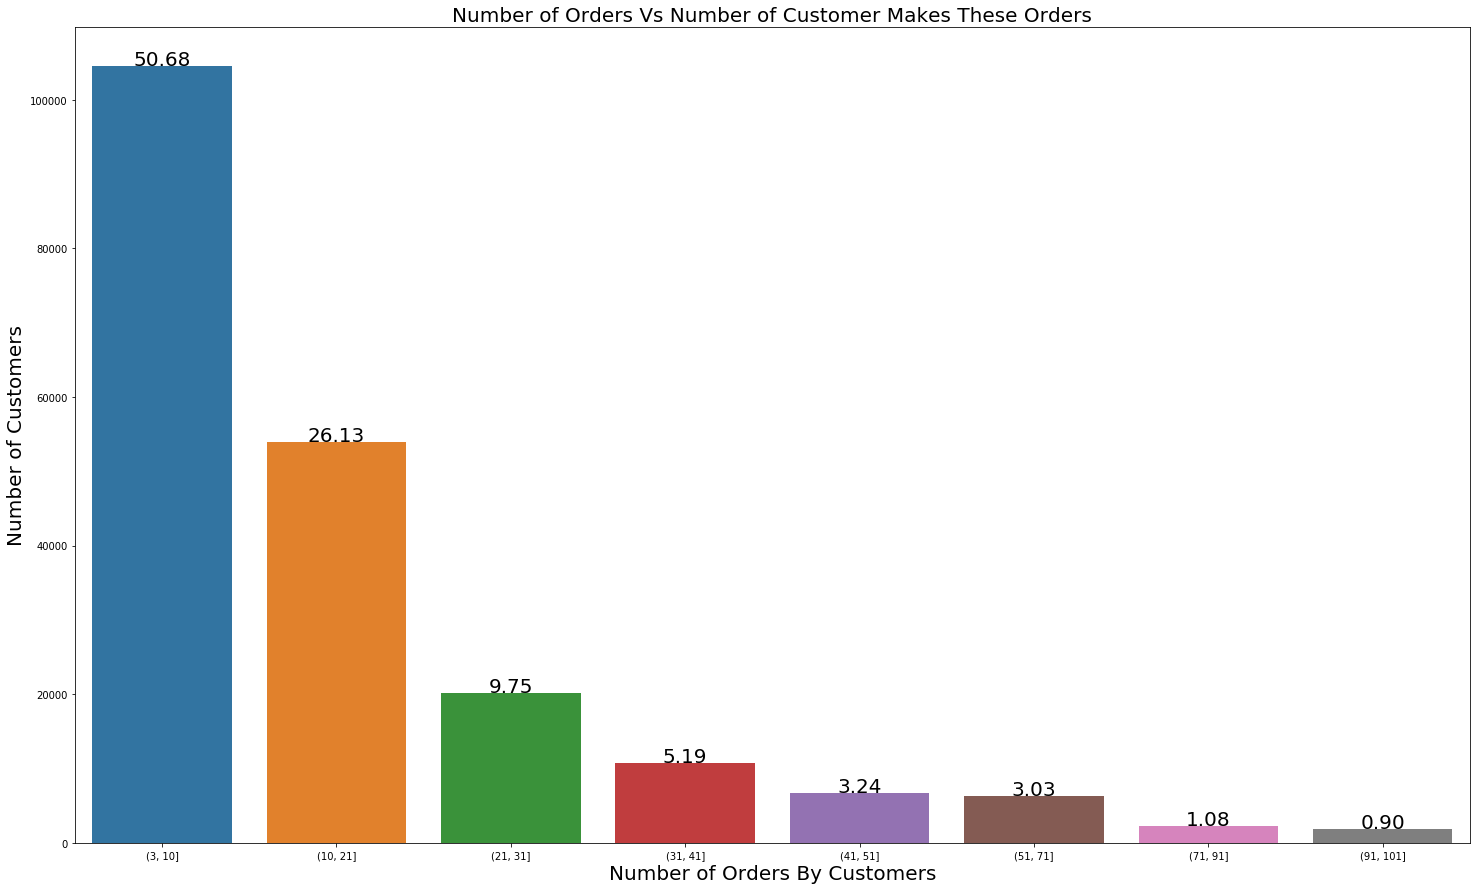

In [67]:
plt.figure(figsize=(25,15))
ax = sns.countplot(freq_bins["order_number"])
plt.title("Number of Orders Vs Number of Customer Makes These Orders", fontsize = 20)
plt.xlabel("Number of Orders By Customers", fontsize = 20)
plt.ylabel("Number of Customers", fontsize = 20)
total = float(len(freq_bins))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}'.format((height/total) * 100),
            ha="center", fontsize = 20) 


Creating campaigns based on date and time of the day is popular in retail industry. In such campaigns, retailer generally seeking two targets. First one is increasing orders in idle time of e-commerce store and second is increasing the number of orders of customers whose pattern is match with the date and time. For this purpose, I created the day and time analysis of customers purchases in the following figure.

In [68]:
orders.head()

,order_id,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order
0,2539329,1,1,2,tuesday,8,morning,0.0
1,2398795,1,2,3,wednesday,7,morning,15.0
2,473747,1,3,3,wednesday,12,morning,21.0
3,2254736,1,4,4,thursday,7,morning,29.0
4,431534,1,5,4,thursday,15,afternoon,28.0


In [86]:
time_analysis = orders.groupby(by = ['order_day', 'day_segment'])['order_number'].count().reset_index()

In [88]:
time_analysis

,order_day,day_segment,order_number
0,friday,afternoon,201336
1,friday,evening,54341
2,friday,morning,183623
3,friday,night,14068
4,monday,afternoon,250425
5,monday,evening,64981
6,monday,morning,256929
7,monday,night,15143
8,saturday,afternoon,204522
9,saturday,evening,56858


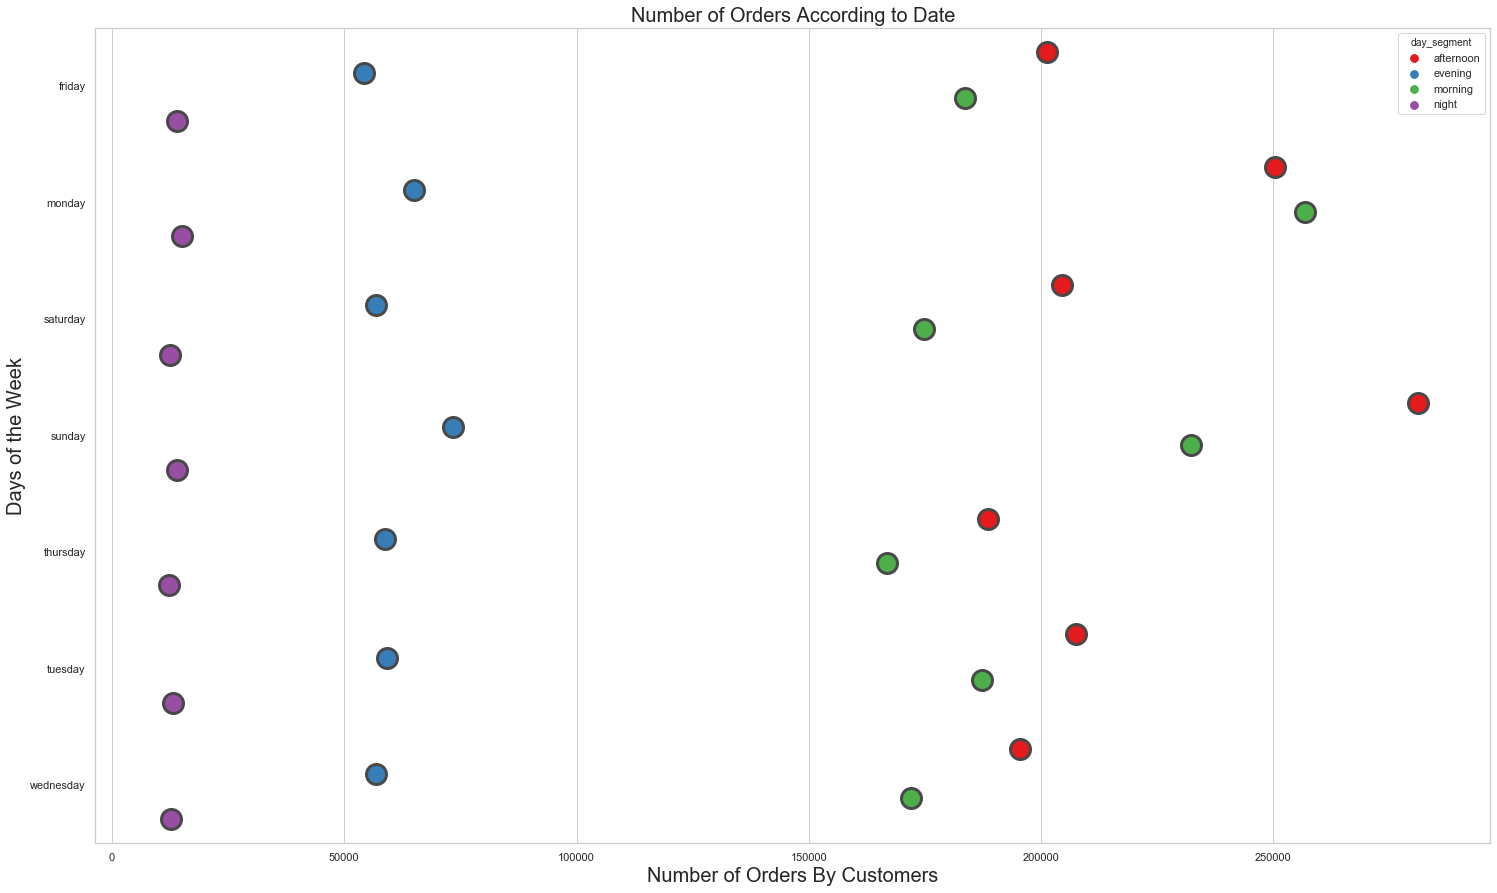

In [116]:
plt.figure(figsize=(25,15))
sns.set(style = 'whitegrid') 
sns.stripplot(y = time_analysis['order_day'], hue = time_analysis['day_segment'], x = time_analysis['order_number'],
             palette = 'Set1', split = True, size = 20, jitter=0.1, linewidth=3)

plt.title("Number of Orders According to Date", fontsize = 20)
plt.xlabel("Number of Orders By Customers", fontsize = 20)
plt.ylabel("Days of the Week", fontsize = 20)


In [117]:
user_recency =orders.groupby("user_id")["days_since_prior_order"].max().reset_index()

In [118]:
user_recency

,user_id,days_since_prior_order
0,1,30.0
1,2,30.0
2,3,21.0
3,4,30.0
4,5,19.0
...,...,...
206204,206205,30.0
206205,206206,15.0
206206,206207,30.0
206207,206208,20.0


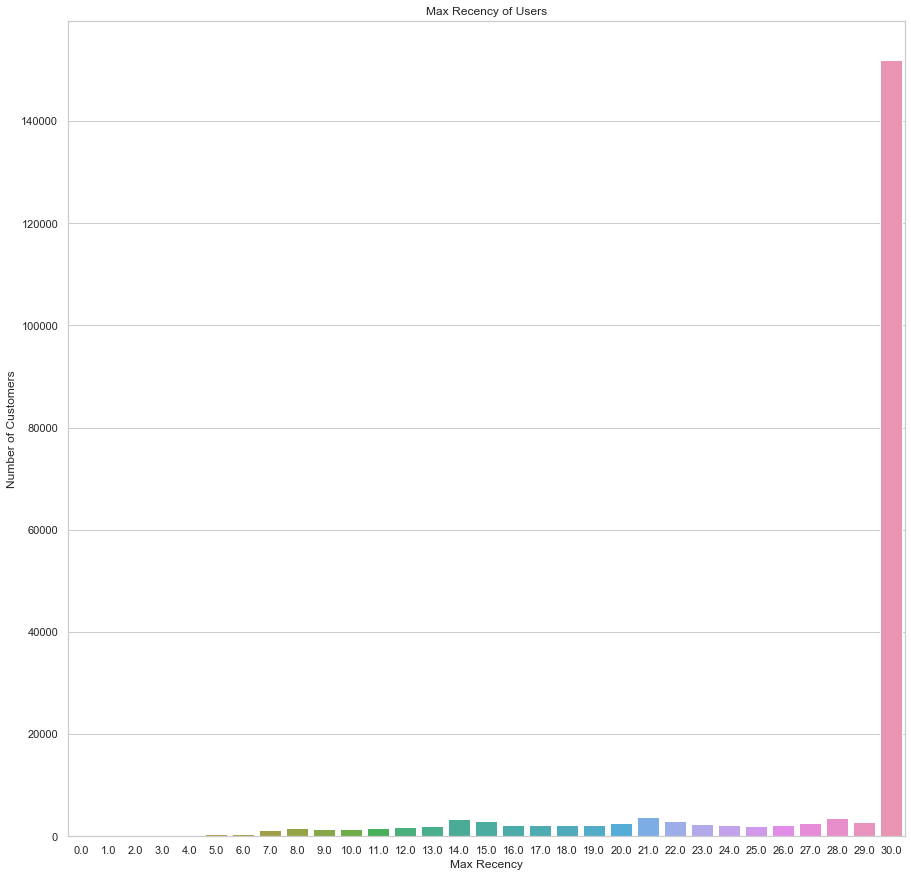

In [127]:
plt.figure(figsize=(15,15))
sns.countplot(user_recency["days_since_prior_order"])
plt.title("Max Recency of Users")
plt.xlabel("Max Recency")
plt.ylabel("Number of Customers")

total = float(len(user_recency))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}'.format((height/total) * 100),
            ha="center", fontsize = 20) 

In [193]:
orders['reorder_pattern'] = 'daily'
orders['reorder_pattern'][orders['days_since_prior_order'] <= 1] = 'daily'
orders['reorder_pattern'][(orders['days_since_prior_order'] > 1) & (orders['days_since_prior_order'] <= 7)]  = 'weekly'
orders['reorder_pattern'][(orders['days_since_prior_order'] > 7) & (orders['days_since_prior_order'] <= 15)]  = 'biweekly'
orders['reorder_pattern'][(orders['days_since_prior_order'] > 15) & (orders['days_since_prior_order'] <= 30)]  = 'monthly'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

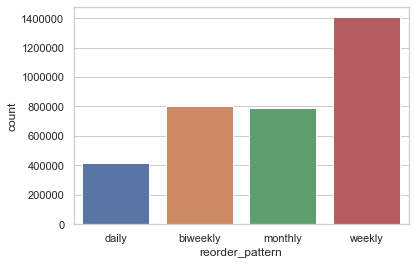

In [196]:
_ = sns.countplot(x=orders['reorder_pattern'])

Now, it's time to create product analysis..

In [311]:
order_product =  pd.merge(left = prior_orders, right = products, on = 'product_id')
product_analysis = pd.merge(left = order_product, right = aisles, on = 'aisle_id')
product_analysis = pd.merge(left = product_analysis, right = departments, on = 'department_id')
product_analysis = pd.merge(left = product_analysis, right = orders[['order_id', 'user_id']],
                            on = 'order_id', how = 'outer')
product_analysis.drop(columns = ['aisle_id', 'department_id', 'product_id'], inplace = True)
product_analysis = product_analysis[['user_id','order_id', 'product_name','aisle','department']]


In [312]:
product_analysis.head()

,user_id,order_id,product_name,aisle,department
0,202279,2,Organic Egg Whites,eggs,dairy eggs
1,202279,2,Michigan Organic Kale,fresh vegetables,produce
2,202279,2,Carrots,fresh vegetables,produce
3,202279,2,Classic Blend Cole Slaw,packaged vegetables fruits,produce
4,202279,2,Garlic Powder,spices seasonings,pantry


In [242]:
top_20 = product_analysis['product_name'].value_counts().head(20)

In [248]:
t2 = pd.DataFrame(top_20)

In this part, we will review the product, department and aisle order performance.

In [258]:
t2.reset_index()
t2.rename(columns = {'product_name': 'orders'} , inplace = True)


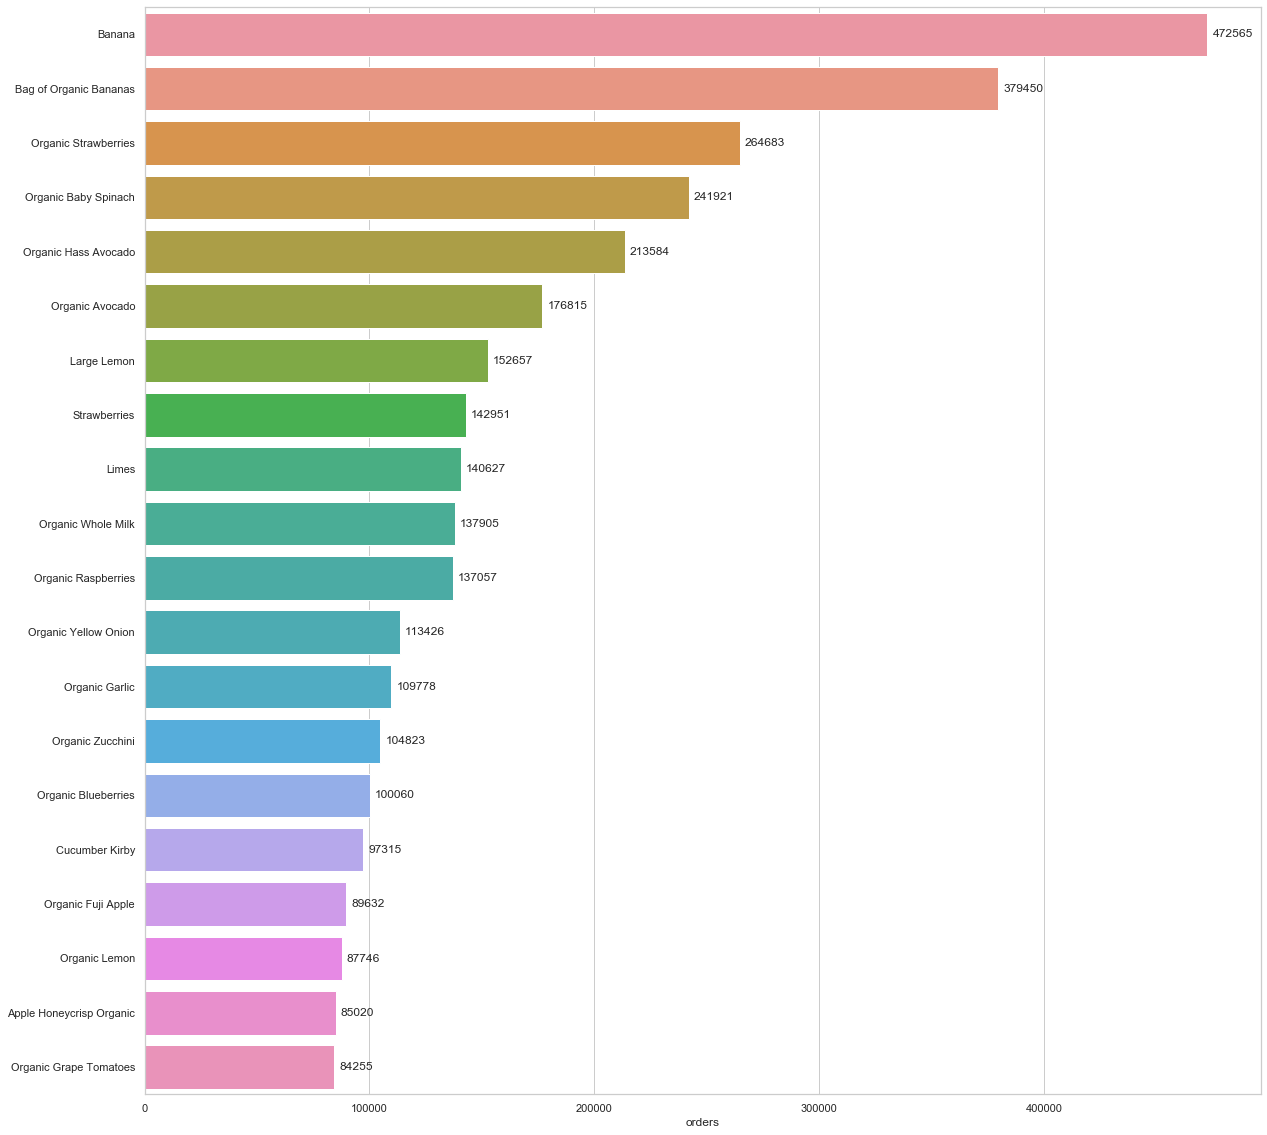

In [273]:
plt.figure(figsize=(20, 20))
k = sns.barplot(x = t2['orders'], y = t2.index, ci = None)
for p in k.patches:
    k.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

In [283]:
top20 = product_analysis['aisle'].value_counts().head(20)
t3 = pd.DataFrame(top20)
t3.reset_index()
t3.rename(columns = {'aisle': 'orders'} , inplace = True)
t3.head()

,orders
fresh fruits,3642188
fresh vegetables,3418021
packaged vegetables fruits,1765313
yogurt,1452343
packaged cheese,979763


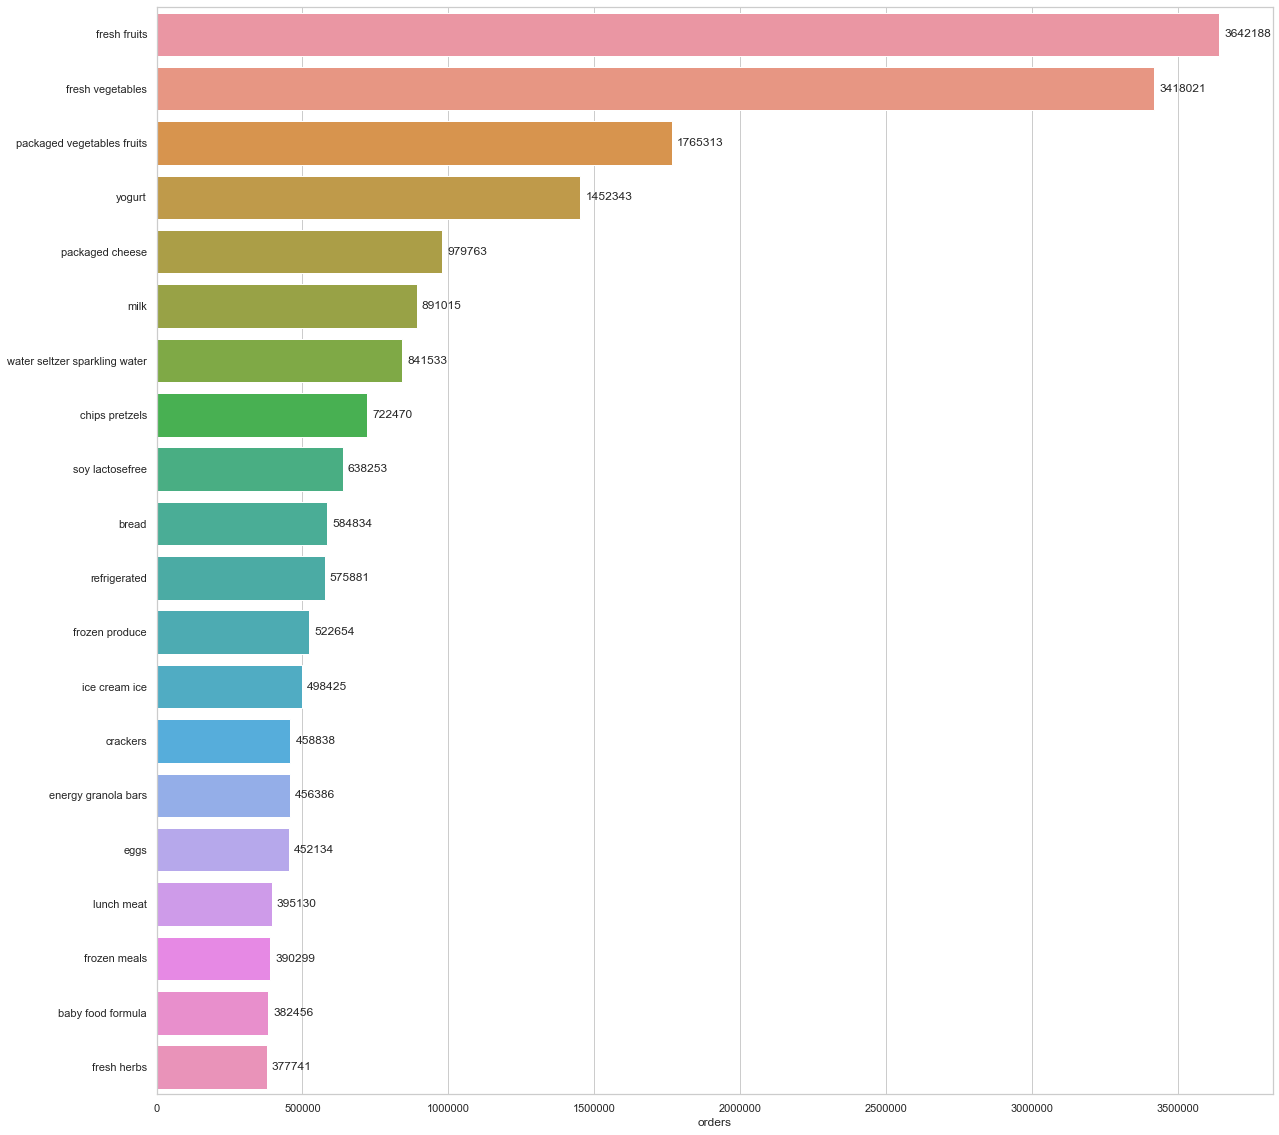

In [284]:
plt.figure(figsize=(20, 20))
k = sns.barplot(x = t3['orders'], y = t3.index, ci = None)
for p in k.patches:
    k.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

In [313]:
product_analysis = product_analysis.loc[:,~product_analysis.columns.duplicated()]

In [314]:
product_analysis.head()

,user_id,order_id,product_name,aisle,department
0,202279,2,Organic Egg Whites,eggs,dairy eggs
1,202279,2,Michigan Organic Kale,fresh vegetables,produce
2,202279,2,Carrots,fresh vegetables,produce
3,202279,2,Classic Blend Cole Slaw,packaged vegetables fruits,produce
4,202279,2,Garlic Powder,spices seasonings,pantry


In [322]:
product_analysis["product_name"].dropna(inplace = True)

In [333]:
top2 = product_analysis['department'].value_counts().head(20)
t4 = pd.DataFrame(top2)
t4.reset_index()
t4.rename(columns = {'department': 'orders'} , inplace = True)
t4.head()

,orders
produce,9479291
dairy eggs,5414016
snacks,2887550
beverages,2690129
frozen,2236432


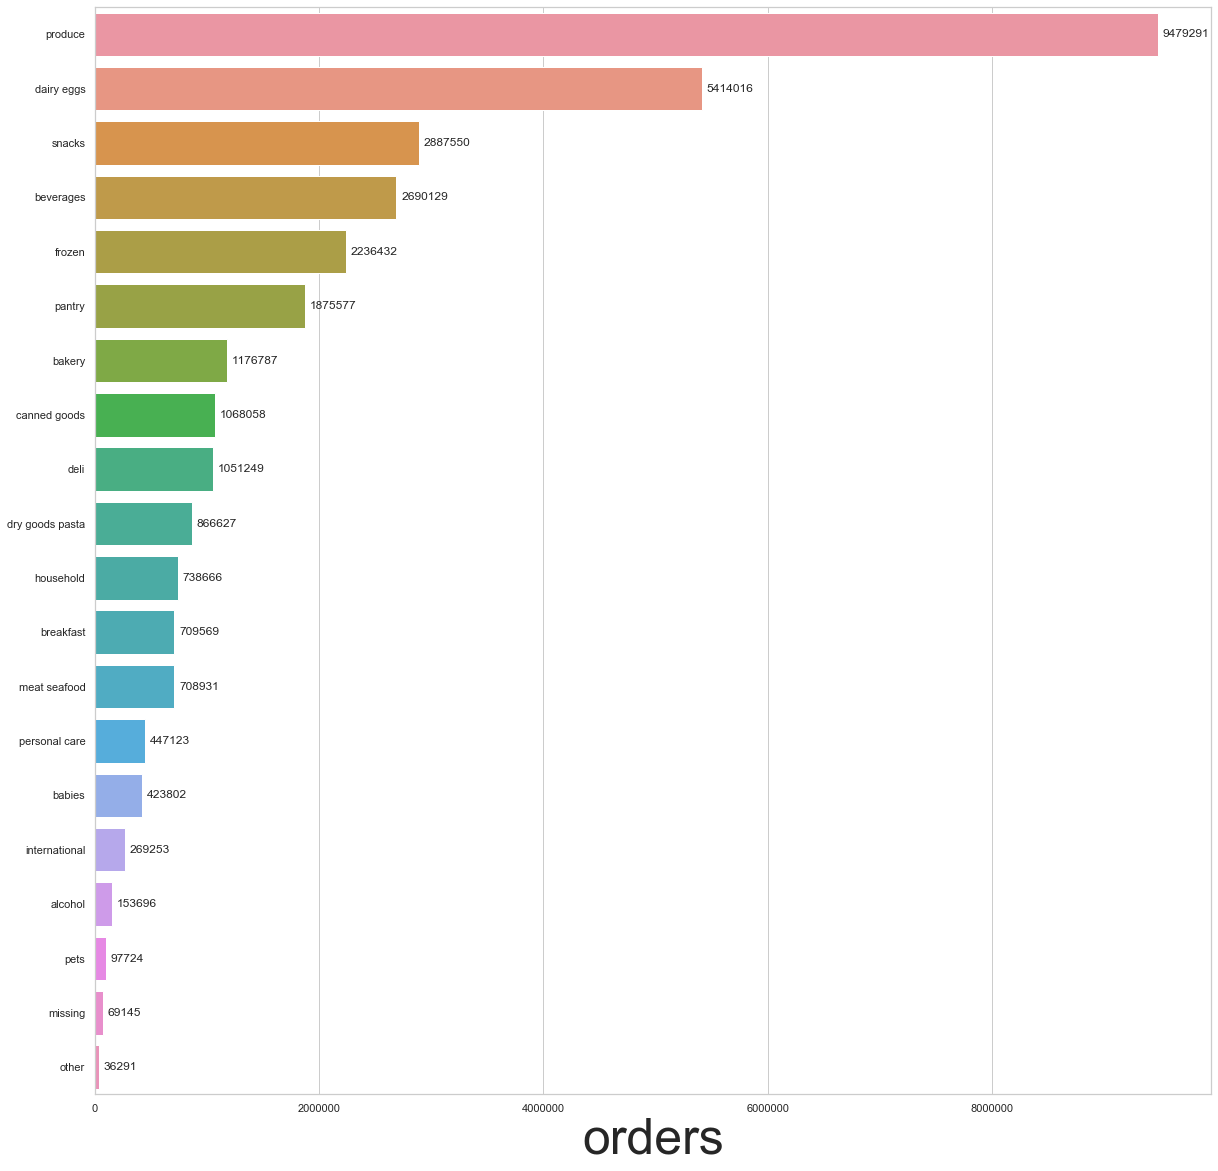

In [346]:
plt.figure(figsize=(20, 20))
k = sns.barplot(x = t4['orders'], y = t4.index, ci = None)
for p in k.patches:
    k.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

Text(0.5, 1.0, 'Departments')

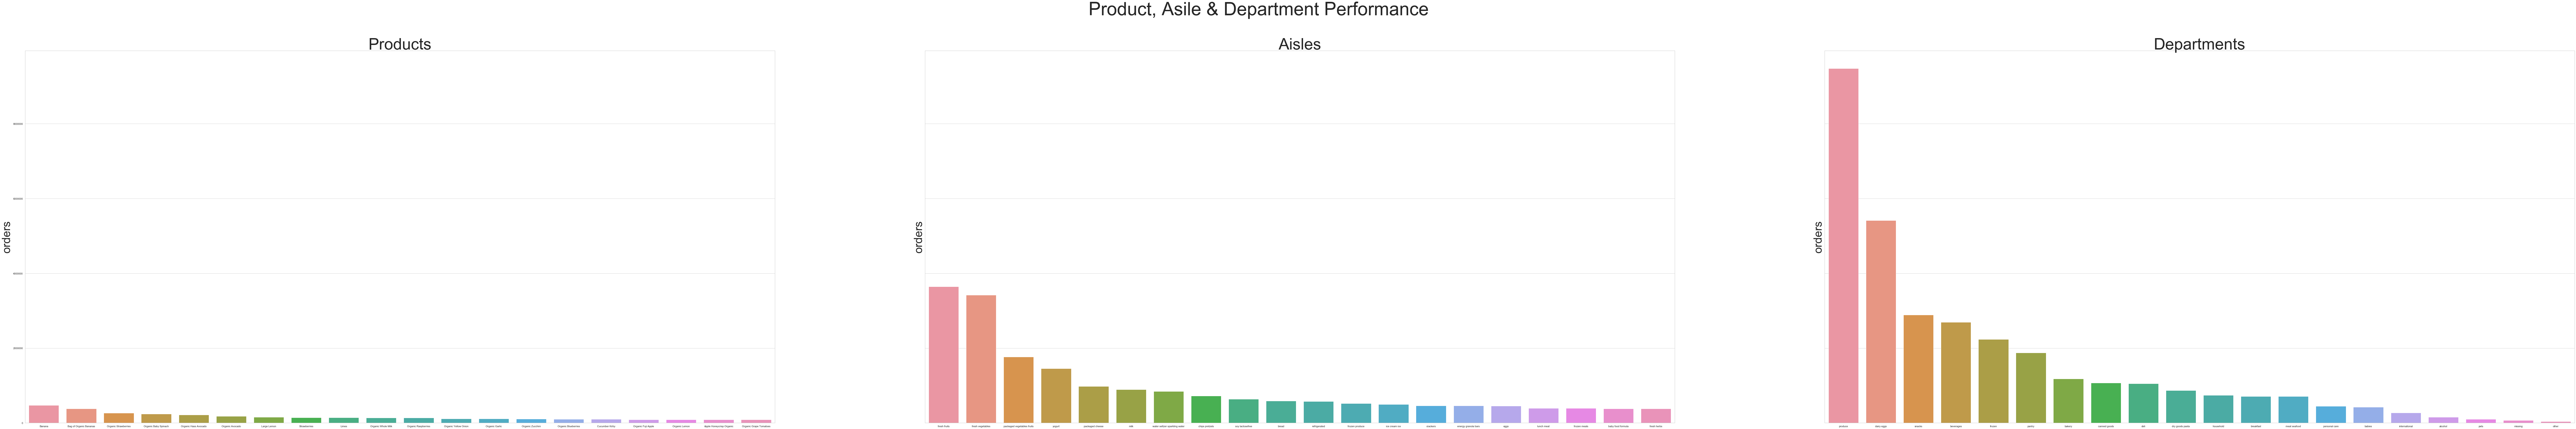

In [344]:
fig, axes = plt.subplots(1, 3, figsize=(200,30), sharey=True)
fig.suptitle('Product, Asile & Department Performance', fontsize = 80)
plt.rcParams["axes.labelsize"] = 50

#products t2
#aisles t3
#departments t4

# Bulbasaur
sns.barplot(ax=axes[0], x=t2.index, y=t2["orders"])
axes[0].set_title("Products", fontsize = 70)

# Charmander
sns.barplot(ax=axes[1], x=t3.index, y=t3["orders"])
axes[1].set_title("Aisles", fontsize = 70)

# Squirtle
sns.barplot(ax=axes[2], x=t4.index, y=t4["orders"])
axes[2].set_title("Departments", fontsize = 70)


In [350]:
pp = pd.merge(prior_orders, orders, on ="order_id")

In [359]:
pp = pp.loc[:,~pp.columns.duplicated()]

In [363]:
pp.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order,reorder_pattern
0,2,33120,1,1,202279,3,5,friday,9,morning,8.0,biweekly
1,2,28985,2,1,202279,3,5,friday,9,morning,8.0,biweekly
2,2,9327,3,0,202279,3,5,friday,9,morning,8.0,biweekly
3,2,45918,4,1,202279,3,5,friday,9,morning,8.0,biweekly
4,2,30035,5,0,202279,3,5,friday,9,morning,8.0,biweekly


In [370]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Now let's crate a table where we can see all orders with their product, department and aisle names.

In [372]:
dd = pd.merge(pp, products, how='right', right_on='product_id', left_on='product_id')

In [373]:
dd.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order,reorder_pattern,product_name,aisle_id,department_id
0,2.0,33120,1.0,1.0,202279.0,3.0,5.0,friday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16
1,26.0,33120,5.0,0.0,153404.0,2.0,0.0,sunday,16.0,afternoon,7.0,weekly,Organic Egg Whites,86,16
2,120.0,33120,13.0,0.0,23750.0,11.0,6.0,saturday,8.0,morning,10.0,biweekly,Organic Egg Whites,86,16
3,327.0,33120,5.0,1.0,58707.0,21.0,6.0,saturday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16
4,390.0,33120,28.0,1.0,166654.0,48.0,0.0,sunday,12.0,morning,9.0,biweekly,Organic Egg Whites,86,16


In [374]:
dd = dd.loc[:,~dd.columns.duplicated()]

In [375]:
dd.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order,reorder_pattern,product_name,aisle_id,department_id
0,2.0,33120,1.0,1.0,202279.0,3.0,5.0,friday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16
1,26.0,33120,5.0,0.0,153404.0,2.0,0.0,sunday,16.0,afternoon,7.0,weekly,Organic Egg Whites,86,16
2,120.0,33120,13.0,0.0,23750.0,11.0,6.0,saturday,8.0,morning,10.0,biweekly,Organic Egg Whites,86,16
3,327.0,33120,5.0,1.0,58707.0,21.0,6.0,saturday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16
4,390.0,33120,28.0,1.0,166654.0,48.0,0.0,sunday,12.0,morning,9.0,biweekly,Organic Egg Whites,86,16


In [377]:
da = pd.merge(dd, aisles, how='right', right_on='aisle_id', left_on='aisle_id')

In [378]:
da = da.loc[:,~da.columns.duplicated()]

In [379]:
dc = pd.merge(da, departments, how='right', right_on='department_id', left_on='department_id')

In [380]:
dc = dc.loc[:,~dc.columns.duplicated()]

In [381]:
dc.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_day,order_hour_of_day,day_segment,days_since_prior_order,reorder_pattern,product_name,aisle_id,department_id,aisle,department
0,2.0,33120,1.0,1.0,202279.0,3.0,5.0,friday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16,eggs,dairy eggs
1,26.0,33120,5.0,0.0,153404.0,2.0,0.0,sunday,16.0,afternoon,7.0,weekly,Organic Egg Whites,86,16,eggs,dairy eggs
2,120.0,33120,13.0,0.0,23750.0,11.0,6.0,saturday,8.0,morning,10.0,biweekly,Organic Egg Whites,86,16,eggs,dairy eggs
3,327.0,33120,5.0,1.0,58707.0,21.0,6.0,saturday,9.0,morning,8.0,biweekly,Organic Egg Whites,86,16,eggs,dairy eggs
4,390.0,33120,28.0,1.0,166654.0,48.0,0.0,sunday,12.0,morning,9.0,biweekly,Organic Egg Whites,86,16,eggs,dairy eggs


Let's get rid off unneccessary columns

In [382]:
dc.drop(columns = ['aisle_id', 'department_id', 'product_id', 'order_dow', 'order_hour_of_day', 
                  'days_since_prior_order'], inplace = True)

In [383]:
dc.head()

,order_id,add_to_cart_order,reordered,user_id,order_number,order_day,day_segment,reorder_pattern,product_name,aisle,department
0,2.0,1.0,1.0,202279.0,3.0,friday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
1,26.0,5.0,0.0,153404.0,2.0,sunday,afternoon,weekly,Organic Egg Whites,eggs,dairy eggs
2,120.0,13.0,0.0,23750.0,11.0,saturday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
3,327.0,5.0,1.0,58707.0,21.0,saturday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
4,390.0,28.0,1.0,166654.0,48.0,sunday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs


Now, we can make a clear department analysis

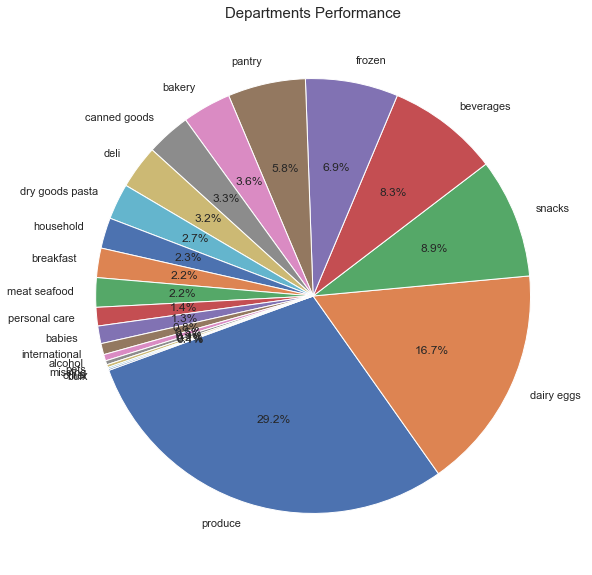

In [385]:
plt.figure(figsize=(10,10))
dep = dc['department'].value_counts()
labels = (np.array(dep.index))
sizes = (np.array((dep / dep.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments Performance", fontsize=15)
plt.show()

In [390]:
kk = dc.pivot_table(index = 'department', columns = 'reorder_pattern', aggfunc = {'reorder_pattern':"count"})

In [391]:
kk.head()

reorder_pattern                         
reorder_pattern        biweekly   daily monthly   weekly
department                                              
alcohol                   33483   26433   31824    61956
babies                   107032   36690   75629   204451
bakery                   301858  123485  258621   492823
beverages                680688  299745  595647  1114049
breakfast                186189   75460  158653   289267

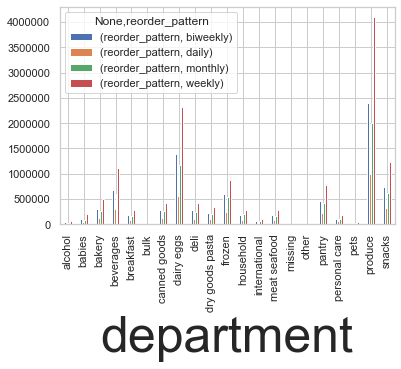

In [393]:
kk.plot(kind = "bar")

Now, let's explore the add_to_cart order pattern of customers


In [417]:
dc.head()

,order_id,add_to_cart_order,reordered,user_id,order_number,order_day,day_segment,reorder_pattern,product_name,aisle,department
0,2.0,1.0,1.0,202279.0,3.0,friday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
1,26.0,5.0,0.0,153404.0,2.0,sunday,afternoon,weekly,Organic Egg Whites,eggs,dairy eggs
2,120.0,13.0,0.0,23750.0,11.0,saturday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
3,327.0,5.0,1.0,58707.0,21.0,saturday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs
4,390.0,28.0,1.0,166654.0,48.0,sunday,morning,biweekly,Organic Egg Whites,eggs,dairy eggs


In [436]:
kk2 = dc[dc["add_to_cart_order"] < 20].pivot_table(index = 'add_to_cart_order', columns = 'reorder_pattern', aggfunc = {'reorder_pattern':"count"})

cm = sns.light_palette("green", as_cmap=True)
kk2.style.background_gradient(cmap=cm)